In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [327]:
import tensorflow as tf
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [328]:
import sys
sys.path.append('..')
from dataset import batcher

In [329]:
MODEL_DIR = '../saved_models/'
LR_RATE = 0.001
OPT = tf.keras.optimizers.Adam(learning_rate=LR_RATE)
LOSS = 'MeanSquaredError'
METRICS = ['RootMeanSquaredError']

In [404]:
# Get test split
test_batcher = batcher.Batcher(bucket=False, shuffle=False, split='test', repeat=1, batch_size=652).get_dataset()
x_true = []
y_true = []
for x, y in test_batcher:
    x_true.append(x)
    y_true.append(y)

print(np.shape(x_true))

(1, 652, 224, 224, 1)


In [405]:
# Load model
experiments = ['imagery_sample_vgg_regression_nightlightsonly']

def load_model_from_dir(model_name):
    model_path = MODEL_DIR + model_name + '.h5'
    model = tf.keras.models.load_model(model_path, compile=False)
    
    return model

In [406]:
# Get consumption predictions
trained_model = load_model_from_dir(experiments[0])
trained_model.compile(
            loss=LOSS,
            optimizer=OPT,
            metrics=METRICS,
        )

y_preds = trained_model.predict_on_batch(x_true)
print(y_preds)

2023-02-04 17:36:13.754826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[[0.0796053 ]
 [0.12132595]
 [0.07222208]
 [0.07171446]
 [0.01200183]
 [0.24632835]
 [0.08612777]
 [0.09546153]
 [0.07383395]
 [0.14962348]
 [0.07162581]
 [0.1383894 ]
 [0.07148659]
 [0.07162859]
 [0.12394813]
 [0.07306066]
 [0.07291602]
 [0.07106359]
 [0.07208408]
 [0.07218403]
 [0.07240605]
 [0.0716005 ]
 [0.0796053 ]
 [0.14206389]
 [0.07179984]
 [0.07255273]
 [0.07234111]
 [0.11037635]
 [0.07225189]
 [0.07145536]
 [0.07088664]
 [0.10362823]
 [0.07177179]
 [0.07212014]
 [0.07939007]
 [0.07210611]
 [0.20691317]
 [0.07132303]
 [0.07123309]
 [0.11201857]
 [0.101027  ]
 [0.07158859]
 [0.07195307]
 [0.07185045]
 [0.07197707]
 [0.11904997]
 [0.11531568]
 [0.07175843]
 [0.07794198]
 [0.07133987]
 [0.07144473]
 [0.07351382]
 [0.07175645]
 [0.07048067]
 [0.07257845]
 [0.07164771]
 [0.07214293]
 [0.0721965 ]
 [0.07122236]
 [0.07180133]
 [0.1330531 ]
 [0.1843191 ]
 [0.07238468]
 [0.07212391]
 [0.07525737]
 [0.07219218]
 [0.10362823]
 [0.07123309]
 [0.07164365]
 [0.07167853]
 [0.07259447]
 [0.07

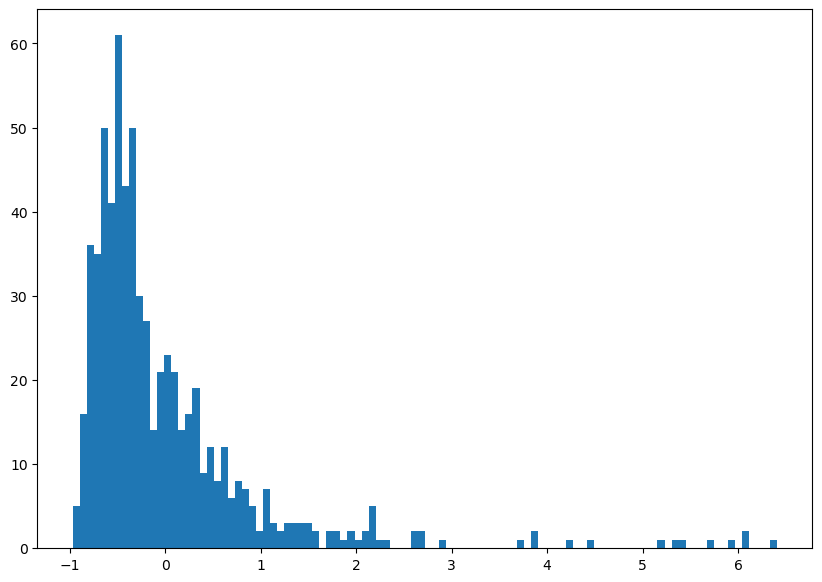

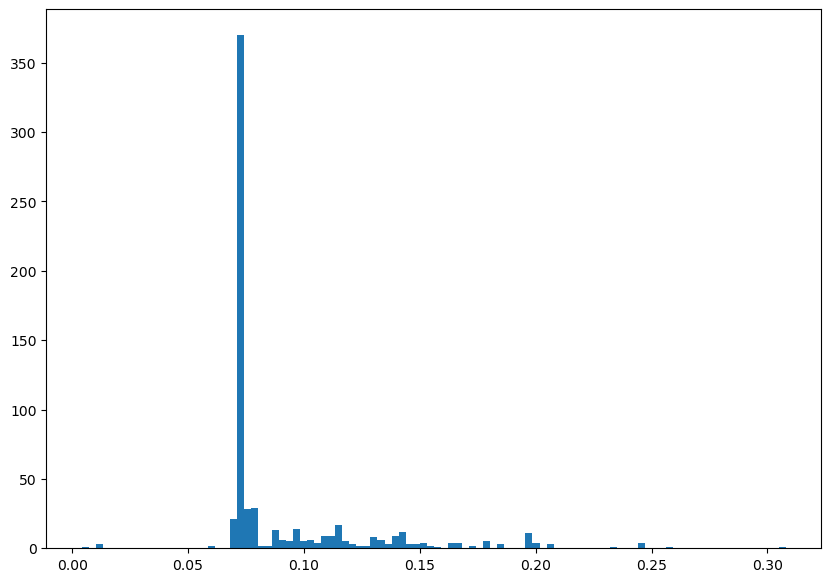

In [407]:
# Find r-squared
y_true = np.squeeze(y_true)
y_preds = np.squeeze(y_preds)

# Plot histograms
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_true, bins = 100)
plt.show()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_preds, bins = 100)
plt.show()


r2 = pearsonr(y_true, y_preds)[0]

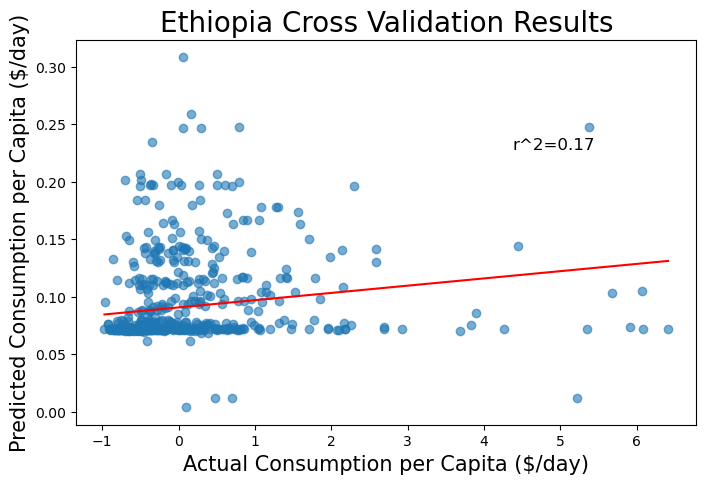

In [408]:
# Plot predictions
country = 'Ethiopia'
fig = plt.figure(figsize=(8,5))
plt.scatter(y_true, y_preds, alpha=0.6)
plt.plot(np.unique(y_true), np.poly1d(np.polyfit(y_true, y_preds, 1))(np.unique(y_true)), color='red')
plt.text(0.5, 0.5, f'r^2={round(r2, 2)}', ha='left', va='top', size=12, transform=ax.transAxes)
plt.xlabel('Actual Consumption per Capita ($/day)', fontsize=15)
plt.ylabel('Predicted Consumption per Capita ($/day)', fontsize=15)
plt.title(f'{country} Cross Validation Results', fontsize=20)
# plt.xlim([np.min(y_true), 10])
# plt.ylim([np.min(y_true), 10])
plt.show()